# Remove Seasonality - part B

We can also remove seasonality by applying a centred-moving average. Let's see this approach applied to the Airline Passengers dataset.

Let's import first the libraries we need:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ingest the data
data_set = pd.read_csv('data/airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"])

In [3]:
# add the column moy (i.e., month of year) and year to use later on to compute the seasonal component
data_set['moy'] = data_set["Month"].dt.month
data_set['year'] = data_set["Month"].dt.year 

In [4]:
# set the index
data_set.set_index("Month", inplace=True)

In [5]:
# compute the centred moving average and the moving average
data_set['centred-MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=True).mean()
data_set['MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=False).mean()

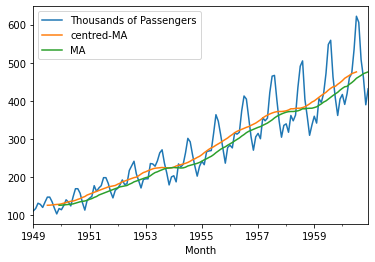

In [6]:
# visualize the original data and the two moving averages
data_set[["Thousands of Passengers","centred-MA","MA"]].plot()
plt.show()

In [7]:
data_set['detrended'] = data_set['Thousands of Passengers']-data_set['centred-MA']

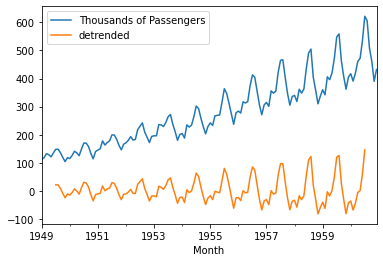

In [8]:
data_set[["Thousands of Passengers","detrended"]].plot()

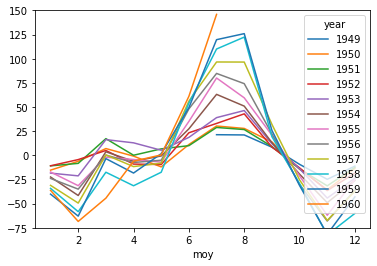

In [9]:
moys = data_set.pivot(index='moy', columns='year', values='detrended')
ax = moys.plot()
ax.set_ylim([-75,150])
plt.show()

Once we obtain the detrended time series, we group the data by the month of the year (moy) and compute the mean:

In [10]:
subsequence = data_set[["detrended","moy"]].groupby(["moy"]).mean()
subsequence.rename(columns={"detrended": "season"},inplace=True)

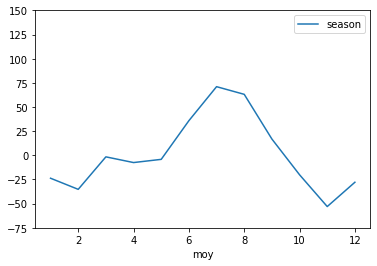

In [11]:
ax = subsequence.plot()
ax.set_ylim([-75,150])
plt.show()

In [12]:
mean = subsequence.mean()

In [13]:
subsequence["season"] = subsequence["season"]-float(mean)

After obtaining one seasonal component, we create our seasonal time series by duplicating for the number of cycles present in the data (in this case 12):

In [14]:
seasonal_component = subsequence
for i in range(0,11):
    seasonal_component = pd.concat([seasonal_component,subsequence])
seasonal_component = seasonal_component.reset_index()

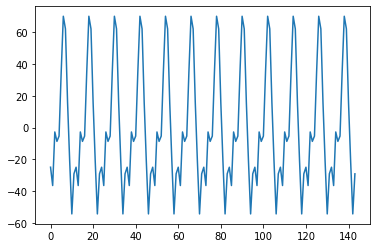

In [15]:
seasonal_component["season"].plot()

In [22]:
data_set['deseasoned'] = data_set['Thousands of Passengers'].values - seasonal_component["season"].values
data_set['deseasoned & detrended'] = data_set['detrended'].values - seasonal_component["season"].values

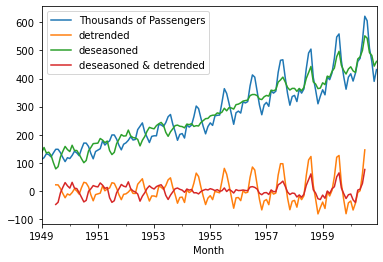

In [23]:
data_set[["Thousands of Passengers","detrended",'deseasoned','deseasoned & detrended']].plot()

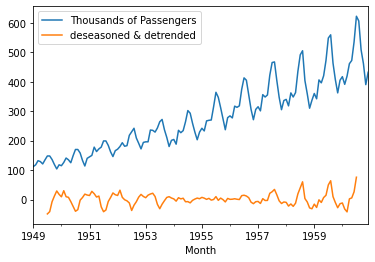

In [24]:
data_set[["Thousands of Passengers",'deseasoned & detrended']].plot()